In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc03s

Data load and region parameters

In [3]:
name = 'M8'

In [4]:
reg = 'Lagoon'

In [5]:
pickle_in = open('SFresults//' + name + '.pkl',"rb")
SFresults = pickle.load(pickle_in)

In [6]:
B = SFresults['b2'][:-3]
r = SFresults['s'][:-3]
s0 = SFresults['s0']  
m = SFresults['m'] 
sig2 = SFresults['sig2'] 
r0 = SFresults['r0'] 
noise = 0.1

In [7]:
model02 = lmfit.Model(bfunc03s)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.1
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 1.5

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r = r, r0 = r0, m = m, s0 = s0, noise = noise, sig2=sig2,
)

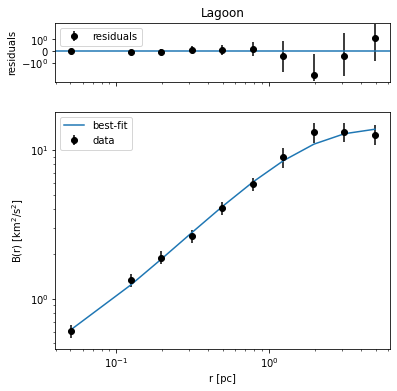

In [11]:
fig, _ = result2.plot( 'ko')
fig.axes[0].set(
    title=reg,
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale = "log",
    yscale = "log",
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
);

plt.savefig('Imgs//SF//' + reg + '.pdf', bbox_inches='tight')



In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc03s)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 10
    # variables        = 5
    chi-square         = 2.73710601
    reduced chi-square = 0.54742120
    Akaike info crit   = -2.95683930
    Bayesian info crit = -1.44391383
[[Variables]]
    r0:     0.97033586 +/- 0.33621971 (34.65%) (init = 1.032431)
    sig2:   6.86748625 +/- 3.63762066 (52.97%) (init = 7.526434)
    m:      1.08816497 +/- 0.49490305 (45.48%) (init = 1)
    s0:     0.00811497 +/- 0.73305660 (9033.39%) (init = 0.005454154)
    noise:  0.29940310 +/- 7.38277648 (2465.83%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s0, noise)   =  1.000
    C(sig2, m)     = -0.983
    C(m, noise)    =  0.981
    C(sig2, noise) = -0.980
    C(sig2, s0)    = -0.979
    C(m, s0)       =  0.979
    C(r0, s0)      =  0.877
    C(r0, noise)   =  0.874
    C(r0, m)       =  0.787
    C(r0, sig2)    = -0.769


In [13]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=4.158242698745961e-11 < 1e-05 at iteration 5 and prob(r0=0.48516793161189875) = 0.9651194443110727 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.0052030075334013985 < 1e-05 at iteration 13 and prob(r0=2.2317724854147336) = 0.9548926206404318 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.013669383857059077 < 1e-05 at iteration 13 and prob(sig2=15.795218380961888) = 0.9698319250200307 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.021418465511274902 < 1e-05 at iteration 5 and prob(m=0.5440824868349828) = 0.9700802163139105 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with 

          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :      -inf  -0.27965  -0.13880   0.97034  +0.21514  +1.24317      +inf
 sig2 :  -2.80211  -1.51348  -0.69542   6.86749  +0.90315  +3.50912      +inf
 m    :      -inf  -0.27340  -0.11787   1.08816  +0.11095  +0.27131  +0.61308
 s0   :      -inf      -inf      -inf   0.00811  +0.02384  +0.08524      +inf
 noise:      -inf      -inf  -0.21198   0.29940  +0.17424  +0.30790  +0.48543


In [15]:
CIresults = {'resultCI' : result2,
            'Rmax/r0' : r.max()/result2.params['r0'].value,
            'lT' : (r[3]/2**0.5)*((result2.params['r0'].value/r[3])**(result2.params['m'].value/2))
          }

In [16]:
f = open('CIresults//' + name +'.pkl',"wb")
pickle.dump(CIresults,f)
f.close()

In [17]:
print('-------------------------------')
print('Parameter    Value       Stderr')
for name, param in result2.params.items():
    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))

-------------------------------
Parameter    Value       Stderr
r0          0.97034     0.09703
sig2        6.86749     0.68675
m           1.08816     0.10882
s0          0.00811     0.00081
noise       0.29940     0.02994


plt.style.use([
    "seaborn-poster",
])

plot_limits = {
    "s0": [0.0, 0.1],
    "m": [.5, .5],
    "r0": [0.1, 1.0],
    "noise": [0.0, 0.5],
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [18]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 68.99400401115417 seconds ---
